Template matching can be achieved through normalized correlation. However, what about images that are partially visible, scaled, rotated, or vary in size?

Addressing occlusion, dealing with partially visible images through template matching can become computationally expensive. Thus, a solution lies in detecting unique features and utilizing points of interest.

One such method is **SIFT** (Scale-Invariant Feature Transformation), which excels in image alignment and 2D image detection.

But what exactly constitutes an interest point? In the context of robot vision, interest points are descriptors that offer a more nuanced understanding. While corners and edges may seem like viable candidates, we opt for blobs instead. Blobs represent patches with distinctive local appearances.

**SIFT**, pioneered by David Lowe, not only pinpoints the locations of blobs but also adjusts their magnification based on the camera's depth. It exhibits robustness and reliability in extracting interest points.

While detecting interest points is one aspect, matching them across different images presents a challenge. This is where the SIFT descriptor comes into play. It enables us to identify signatures in the local surroundings, ensuring that these signatures remain invariant to rotations, scales, and variations in lighting.

it uses alot of tricks for efficiency one of them is
1)Fast NLOG Approximation: DoG

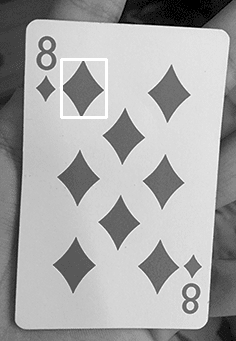

Number of keypoints detected: 98


In [5]:
#SIFT using template matching
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the images
image = cv2.imread('/content/templateMatchingImage.png', 0) # Load the main image
template = cv2.imread('/content/template.png', 0) # Load the template image

# Template matching using normalized correlation
result = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)

# Get the maximum correlation value and its location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw a rectangle around the matched region
template_width, template_height = template.shape[::-1] # Get template dimensions
top_left = max_loc # Top-left corner of the matched region
bottom_right = (top_left[0] + template_width, top_left[1] + template_height) # Bottom-right corner
cv2.rectangle(image, top_left, bottom_right, 255, 2) # Draw rectangle on the image

# Display the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Using SIFT for feature extraction
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image, None)

# Print the number of keypoints detected
print("Number of keypoints detected:", len(keypoints))
